# Africa PD Citations

In [1]:
library(tidyverse)
library(tidylog)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tidylog’


The following objects are masked from ‘package:dplyr’:

    add_count, add_tally, anti_join, count, distinct, distinct_all,
    distinct_at, distinct_if, filter, filter_all, filter_at, filter_if,
    full_join, group_by, group_by_all, group_by_at, group_by_if,
    inner_join, left_join, mutate, mutate_all, mutate_at, mutate_if,
    relocate, rename, rename_all, rename_at, rename_if, rename_with,
    right_join, sample_frac, sample_n, select, select_all, select_at,
    select_if, semi_join, slice, slice_head, slice_max, slice_min,
    slice_sample, slice_tail, summarise, summa

In [2]:
citations = read_tsv("data/citations.tsv")
citations = citations %>% mutate (african_lead = factor(african_lead, levels = c("Yes", "No")))
glimpse(citations)

Rows: 158 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): african_lead
dbl (4): study_id, year, impact_factor, number_of_citations

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
mutate: converted 'african_lead' from character to factor (0 new NA)



Rows: 158
Columns: 6
$ study_id            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ year                <dbl> 2000, 2003, 2005, 2005, 2006, 2006, 2007, 2008, 20…
$ african_lead        <fct> Yes, Yes, No, Yes, No, No, No, No, No, No, No, Yes…
$ impact_factor       <dbl> 8.00, 3.90, 9.00, 2.07, 13.60, 13.60, 8.30, 30.00,…
$ number_of_citations <dbl> 24, 95, 212, 8, 44, 111, 82, 152, 54, 37, 50, 44, …
$ citations_per_year  <dbl> 1.14, 5.27, 13.25, 0.50, 7.40, 5.86, 6.61, 2.25, 1…


Warning message:
“Removed 46 rows containing missing values (geom_point).”
Warning message:
“Removed 46 rows containing missing values (geom_point).”


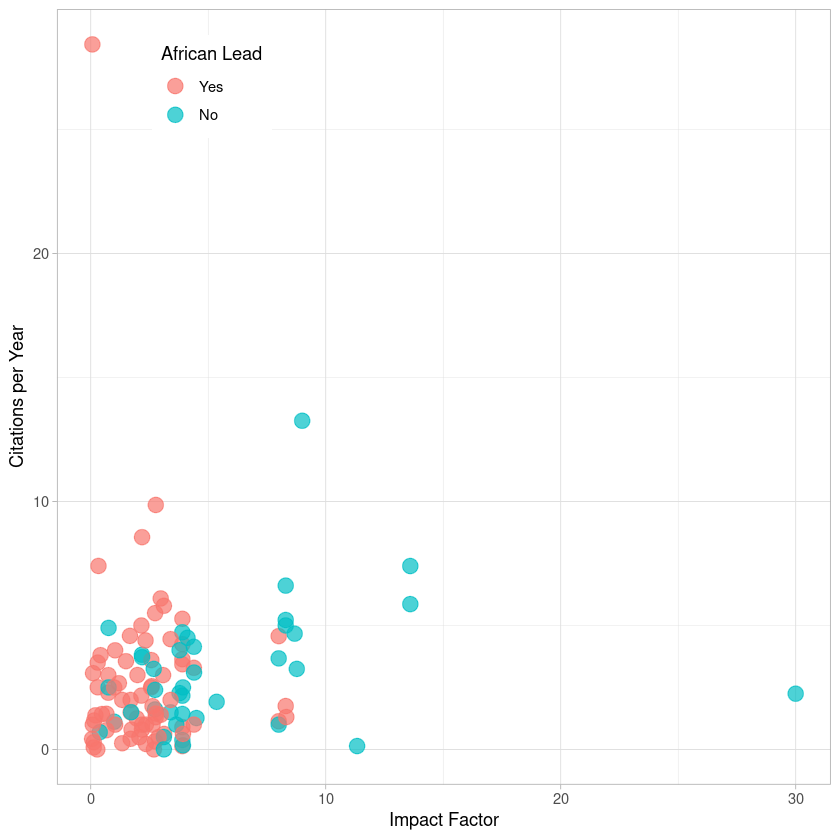

In [3]:
ggplot(citations) +
    geom_jitter(aes(x = impact_factor, y = citations_per_year, color = african_lead), size = 4, alpha = 0.7) +
    theme_light() +
    labs (x = "Impact Factor", y = "Citations per Year", color = "African Lead") +
    theme(legend.position = c(0.2, 0.9))
ggsave("figures/AfricaPDcitations.pdf", width = 6, height = 6)

In [4]:
citations2 = citations %>% mutate (citations_per_year2 = number_of_citations/(2022 - year))
head(citations2)

mutate: new variable 'citations_per_year2' (double) with 99 unique values and 18% NA



study_id,year,african_lead,impact_factor,number_of_citations,citations_per_year,citations_per_year2
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000,Yes,8.00,24,1.14,1.0909091
2,2003,Yes,3.90,95,5.27,5.0000000
3,2005,No,9.00,212,13.25,12.4705882
4,2005,Yes,2.07,8,0.50,0.4705882
5,2006,No,13.60,44,7.40,2.7500000
6,2006,No,13.60,111,5.86,6.9375000


Warning message:
“Removed 41 rows containing missing values (geom_point).”
Warning message:
“Removed 41 rows containing missing values (geom_point).”


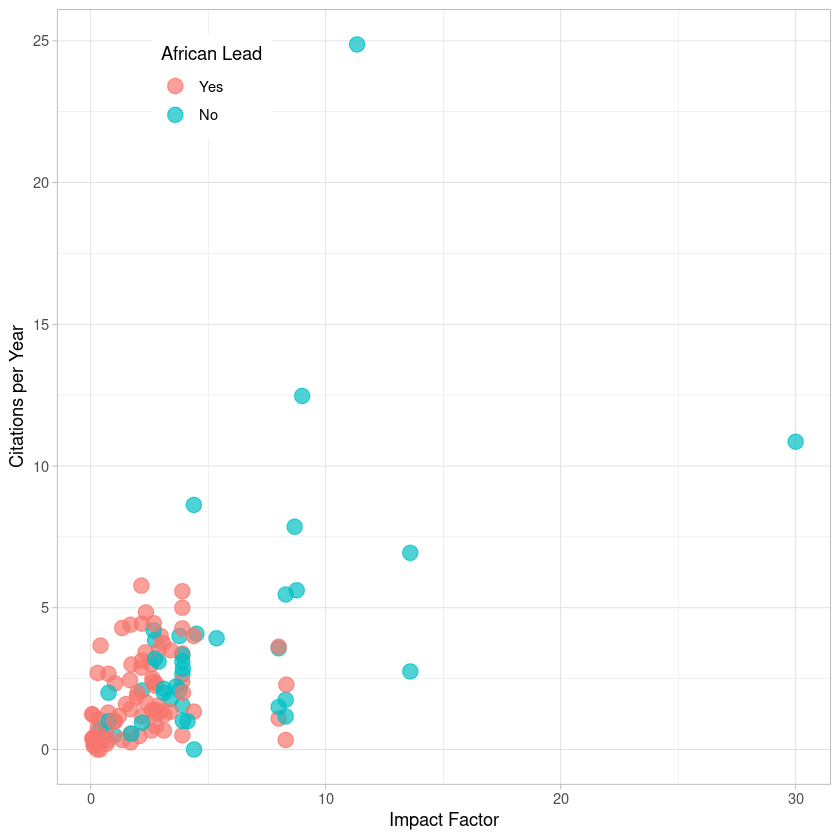

In [5]:
ggplot(citations2) +
    geom_jitter(aes(x = impact_factor, y = citations_per_year2, color = african_lead), size = 4, alpha = 0.7) +
    theme_light() +
    labs (x = "Impact Factor", y = "Citations per Year", color = "African Lead") +
    theme(legend.position = c(0.2, 0.9))
ggsave("figures/AfricaPDcitations2.pdf", width = 6, height = 6)

In [6]:
papers = citations2 %>% group_by (year, african_lead) %>% summarise(papers = n(), impact_factor  = median(impact_factor))
head(papers)

group_by: 2 grouping variables (year, african_lead)

summarise: now 39 rows and 4 columns, one group variable remaining (year)



year,african_lead,papers,impact_factor
<dbl>,<fct>,<int>,<dbl>
1986,Yes,1,1.672
1988,No,1,8.770
1990,Yes,1,2.186
1993,Yes,1,2.186
2000,Yes,1,8.000
2003,Yes,1,3.900


Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


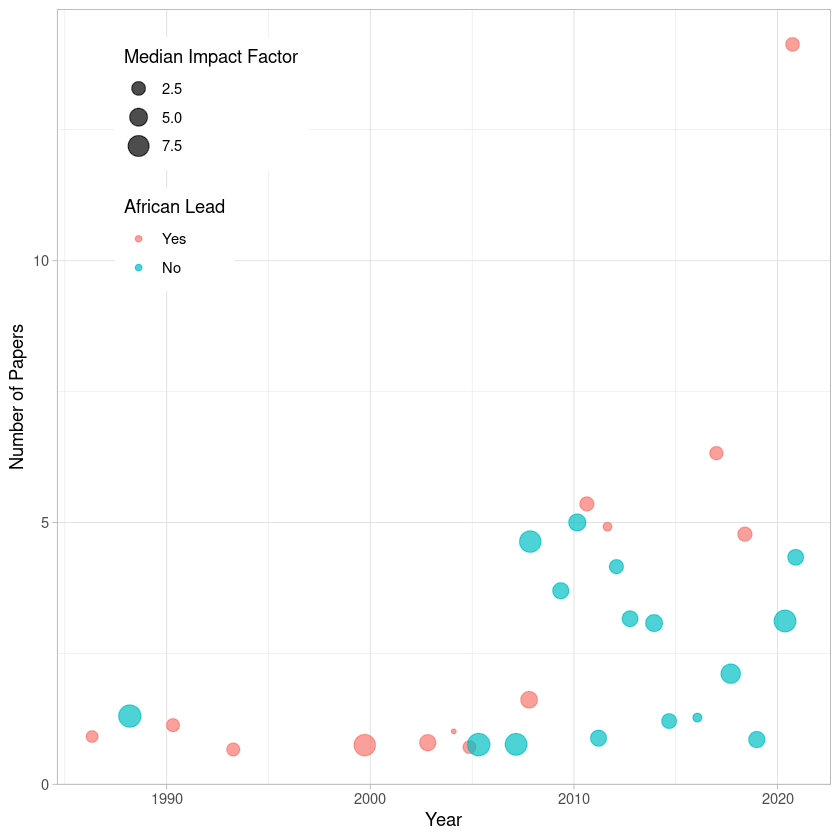

In [7]:
ggplot(papers) +
    geom_jitter(aes(x = year, y = papers, size = impact_factor, color = african_lead), alpha = 0.7) +
    theme_light() +
    labs (x = "Year", y = "Number of Papers", color = "African Lead", size = "Median Impact Factor") +
    theme(legend.position = c(0.2, 0.8))
ggsave("figures/AfricaPDpapers_per_year.pdf", width = 6, height = 6)